In [8]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [9]:
# Adjust [Pa]
P_adjust = 0.002e6
# Adjust [mm] 最初に測定
d_adjust = 6.75
# Adjust [mm] dpが小さいときの2回目に測定
d_adjust = 6.32
d_adjust_small = 6.32
TORR_PA = 133.322

In [10]:
data = pd.read_excel("data.xlsx", sheet_name="(1)large", skiprows=[1])
data.drop(index=[0], inplace=True)
data["p"] = (data["p_m"] + data["p_large"] * P_adjust) / TORR_PA
data["d"] = d_adjust - data["d_m"]
data["pd"] = data["p"] * data["d"]

In [11]:
data_small = pd.read_excel("data.xlsx", sheet_name="(1)small", skiprows=[1])
data_small["p"] = (data_small["p_m"] + data_small["p_large"] * P_adjust) / TORR_PA
data_small["d"] = d_adjust_small - data_small["d_m"]
data_small["pd"] = data_small["p"] * data_small["d"]

$\alpha/p = A\exp(-Bp/E)$

$\alpha d = log(1 + 1/\gamma)$

$E=V_S/d,\,\gamma=cst.$

$\frac{log(1+1/\gamma)}{dp} = A\exp\left(-\frac{Bdp}{V_S}\right)$

$-\frac{Bdp}{V_S} = log\left(\frac{log(1+1/\gamma)}{Adp}\right)$

$V_S = \frac{Bdp}{log(dp) +log(A) - log(1+1/\gamma)}$

In [12]:
V_s = lambda dp, A, B, y: B * dp / np.log(A * dp / (1 + 1/y))
popt, pcov = curve_fit(V_s, data["pd"], data["V_s"], nan_policy="omit")

/home/inohaan/usr/src/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


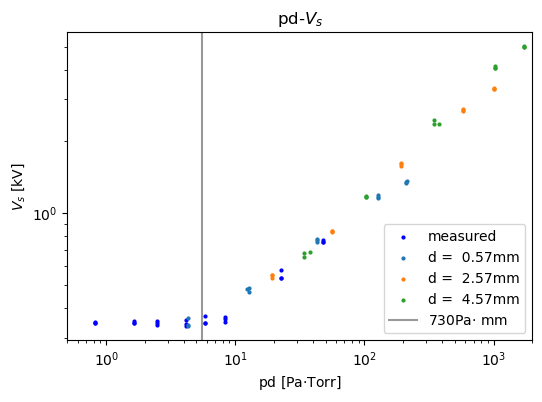

In [17]:
axstg = AxesSetting(title="pd-$V_s$", xlabel="pd [Pa$\cdot$Torr]", ylabel="$V_s$ [kV]", xscale="log", yscale="log", xlim=(5e-1, 2e3))
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# ax.scatter(data["pd"], data["V_s"], c="r", label="measured", s=4)
ax.scatter(data_small["pd"], data_small["V_s"], c="b", label="measured", s=4)
for d, data_d in data.groupby("d"):
    ax.scatter(data_d["pd"], data_d["V_s"], label=f"d = {d: .2f}mm", s=4)
ax.axvline(5.5, c="black", alpha=0.4, label="730Pa$\cdot$ mm")
# axstg.plot_func(ax, lambda dp: V_s(dp, *popt), label="fit", c="black", alpha=0.4)
axstg.apply_axes(ax)